In [1]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime
import gzip
import matplotlib.gridspec as gridspec

from spacepy import coordinates as coord
from spacepy.time import Ticktock

from methods.raytracer_utils import readdump, read_rayfile, read_rayfiles
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec


import methods.xflib as xflib

from methods.index_helpers import load_TS_params
from methods.index_helpers import load_Dst
from methods.index_helpers import load_Kp
from methods.index_helpers import load_ae
from methods.index_helpers import Kp_at
from methods.index_helpers import Ae_at

xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/Thesis figures/methods/libxformd.so')

R2D = 180./np.pi
D2R = np.pi/180.
%matplotlib inline
# %matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 8
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 18,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

(4, 4)
15
30
45
55
15
30
45
55
15
30
45
55
15
30
45
55


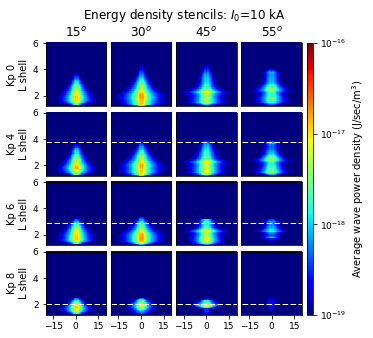

In [15]:
# # --------------- Latex Plot Beautification --------------------------
# fig_width = 7
# fig_height = 6
# fig_size =  [fig_width+1,fig_height+1]
# params = {'backend': 'ps',
#           'axes.labelsize': 14,
#           'font.size': 14,
#           'legend.fontsize': 12,
#           'xtick.labelsize': 12,
#           'ytick.labelsize': 12,
#           'text.usetex': False,
#           'figure.figsize': fig_size}
# plt.rcParams.update(params)
# # --------------- Latex Plot Beautification --------------------------
# --------------- Latex Plot Beautification --------------------------
fig_width = 4.5
fig_height = 4
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 10,
          'font.size': 10,
          'legend.fontsize': 10,
          'xtick.labelsize': 9,
          'ytick.labelsize': 9,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------



in_dir = '/shared/users/asousa/WIPP/lightning_power_study/outputs/nightside/mode6_v3/'

# lats = [15, 20, 25, 30, 35, 40, 45, 50]
lats = [15, 30, 45, 55]
kps = [0,4,6,8]
fig = plt.figure()

widths = [1 for x in lats]
widths.append(0.1)
gs = gridspec.GridSpec(len(kps),len(lats) + 1, width_ratios=widths)
gs.update(wspace=0.1, hspace=0.1) # set the spacing between axes.
ax = []
for k in range(len(kps)):
    for x in range(len(lats)):
        ax.append(plt.subplot(gs[k,x]))
cax = plt.subplot(gs[:,-1])
ax = np.array(ax).reshape(len(kps), len(lats))
print np.shape(ax)
clims = [-19, -16]
p = []

# Kp =  0 7.98150681167 6.10722722785
# Kp =  2 4.80296193404 5.11893314084
# Kp =  4 3.74145363494 4.25148331682
# Kp =  6 2.89254388851 3.43809307201
# Kp =  8 2.05866805608 2.49777808469
# Lpp = [7.98, 4.80, 3.74, 2.89, 2.05]
Lpp = [7.98, 3.74, 2.89, 2.05]
for k, kp in enumerate(kps):
    for x, lat in enumerate(lats):
        print lat
#         print k, x
        with gzip.open(os.path.join(in_dir, 'kp%d/data/data_%g.pklz'%(kp,lat)),'rb') as file:
            data = pickle.load(file)


        data_total = data['data']
        flash_lons = data['lons']
        Lshells    = data['Lshells']
        flash_lon  = flash_lons[0]
        time = data['time']
        dt = time[1]-time[0]
        tmax= time[-1] + dt
        d_lon = flash_lons[1] - flash_lons[0]
        num_lons = len(flash_lons)

        lon_max = flash_lons[-1] - flash_lons[0]

        logdata = np.log10(np.sum(data_total, axis=-1)*dt/tmax)
        logdata[np.isinf(logdata)] = -1000
        logdata = np.vstack([np.flipud(logdata[:,1:].T), logdata.T]).T


        
        xaxis = np.arange(-lon_max, lon_max + d_lon, d_lon)
        p.append(ax[k,x].pcolorfast(xaxis, Lshells, logdata, vmin=clims[0], vmax=clims[1], cmap=plt.get_cmap('jet')))

        ax[k,x].set_ylim([1.2, 6])

        # plasmapause location:
        
        ax[k,x].plot([-25, 25],[Lpp[k],Lpp[k]],linestyle='dashed',linewidth=1, color='w')

#         if x > 0:
#             ax[k,x].set_yticks([])
#         if k < len(kps):
#             ax[k,x].set_xticks([])
        ax[k,x].set_xlim([-20,20])
cb = plt.colorbar(p[-1], cax=cax)
cb.set_label('Average wave power density (J/sec/m$^3$)')
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)
    
for l, lat in enumerate(lats):
    ax[0,l].set_title('%d$^o$'%lat)
for k, kp in enumerate(kps):
    ax[k,0].set_ylabel('Kp %d\nL shell'%kp)
    
for l in range(len(lats)):
    for k in range(len(kps)-1):
        ax[k,l].set_xticks([])
    
for l in range(len(lats)):
    ax[-1,l].set_xticks([-15, 0, 15])
for l in range(len(lats)-1):
    for k in range(len(kps)):
        ax[k,l+1].set_yticks([])
#     ax[0].set_ylabel('L shell')

fig.suptitle('Energy density stencils: $I_0$=%d kA      '%(np.abs(data['I0']/1000)))
fig.subplots_adjust(right=0.8)
fig.savefig('wave_energy_vs_L_stencils.png',dpi=300)
# fig.savefig('wave_energy_vs_L.png',dpi=150)

In [52]:
print data['I0']

-10000


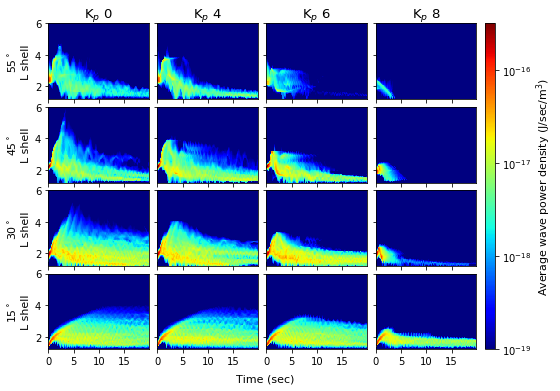

In [64]:
# --------------- Latex Plot Beautification --------------------------
fig_width = 7 
fig_height = 5
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 11,
          'font.size': 11,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------



stencil_dir = '../lightning_power_study/outputs/nightside/mode6_v3'

# subdir = 'kp0'

inlats = [55, 45, 30, 15]
inkps = [0,4,6,8]
clims= [-19, -15.5]
llims = [1.2, 6]
cmap = plt.cm.jet

# fig, ax = plt.subplots(len(inlats),len(inkps))
fig = plt.figure()

ax = []
widths = [1 for x in lats]
widths.append(0.1)
gs = gridspec.GridSpec(len(inlats), len(inkps)+1, width_ratios=widths)
gs.update(wspace=0.1, hspace=0.1) # set the spacing between axes.

for n in range(len(inlats)):
    for p in range(len(inkps)):
        ax.append(plt.subplot(gs[n,p]))    
ax = np.array(ax).reshape(len(inlats), len(inkps))
cax = plt.subplot(gs[:,-1])




for n, inlat in enumerate(inlats):
    for p, k in enumerate(inkps):
        subdir = 'kp%d'%k
        filename = os.path.join(stencil_dir, subdir, 'data','data_%d.pklz'%inlat)

        with gzip.open(filename, 'rb') as file:
            dic = pickle.load(file)
            # Longitude vs L-shell stencil:
#         data_total = dic['data']
        Lshells = dic['Lshells']
        time = dic['time']
#         I0 = dic['I0']
#         dt = time[1] - time[0]
#         tmax = time[-1] + dt
#         lons = dic['lons']  # These are the longitudes at the edge of each column:
#         d_lon = lons[1] - lons[0]
#         lon_max = lons[-1] - lons[0]

        timeseries = np.log10(dic['data'][:,0,:])
        timeseries[np.isinf(timeseries)] = -100
        t = dic['time']

        #     # Original simulation had dimension (fieldline x time x frequency x longitude)
        #     # but we already reduced that data on saving.
        #     # spectrum: ~ (fieldline x frequency x longitude)
        #     # data:     ~ (fieldline x longitude x time)

        pf = ax[n,p].pcolormesh(time, Lshells, timeseries, shading='gourad',cmap=cmap, vmin=clims[0], vmax=clims[1])
        ax[n,p].set_ylim(llims)
        ax[n,p].set_xticks(np.arange(0,20,5))
cb = plt.colorbar(pf, cax=cax)
cb.set_label('Average wave power density (J/sec/m$^3$)')
cticks = np.arange(clims[0],clims[1] + 1)
cb.set_ticks(cticks)
cticklabels = ['$10^{%d}$'%k for k in cticks]
cb.set_ticklabels(cticklabels)

for n in range(len(inlats)):
    for p in range(1, len(inkps)):
        ax[n,p].set_yticklabels([])
    ax[n,0].set_ylabel('%d$^\circ$\nL shell'%inlats[n])

for p in range(len(inkps)):
    for n in range(len(inlats)-1):
        ax[n,p].set_xticklabels([])
    ax[0,p].set_title('K$_p$ %d'%inkps[p])
# gs.tight_layout(fig)

fig.text(0.45, 0.05, 'Time (sec)')
fig.savefig('wave_energy_timeseries_vs_L.png',dpi=300)

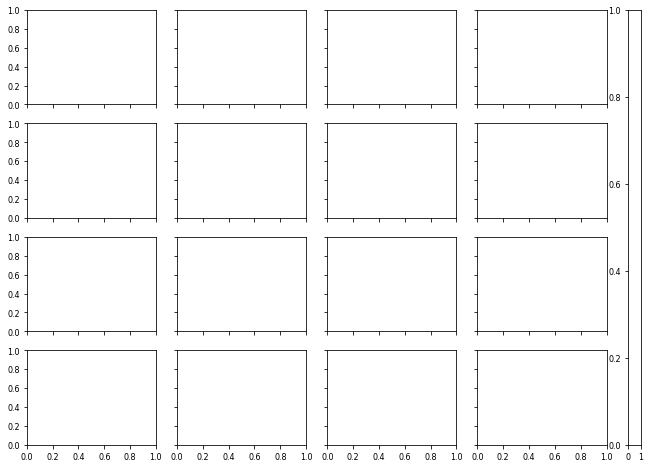

In [32]:
# fig, ax = plt.subplots(len(inlats),len(inkps))

fig = plt.figure()

ax = []
widths = [1 for x in lats]
widths.append(0.1)
gs = gridspec.GridSpec(len(inlats), len(inkps)+1, width_ratios=widths)

for n in range(len(inlats)):
    for p in range(len(inkps)):
        ax.append(plt.subplot(gs[n,p]))    
ax = np.array(ax).reshape(len(inlats), len(inkps))
cax = plt.subplot(gs[:,-1])






for n in range(len(inlats)):
    for p in range(1, len(inkps)):
        ax[n,p].set_yticklabels([])
for n in range(len(inlats)-1):
    for p in range(len(inkps)):
        ax[n,p].set_xticklabels([])